In [62]:
from pathlib import Path
import pprint
import json
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [63]:
#folders = ['imperfect', 'imperfect1', 'imperfect2']

#folders = ['new_results1/tmp', 'new_results2/tmp', 'new_results3/tmp', 'new_results4/tmp']


#folders = ['oos_results1/tmp']


folders = ['oos_ablation/tmp']

files = list(Path(f"agents_eval_results/{folders[0]}").glob("*.json"))
files 

[PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-100.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-1000-v6.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-100-v9.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-1000.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-10-v8.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-10000-v7.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-100-v3.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-10-v2.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-10-v3.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-10000.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-100-v5.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-1000-v3.json'),
 PosixPath('agents_eval_results/oos_ablation/tmp/DMCTS-vs-OOS-10-v4.json'),
 Posi

In [64]:
relevant_data = {}

for file in files:
    with open(str(file), "r") as f:
        data = json.load(f)
    key = [x for x in data.keys() if not x.__contains__("DMCTS") and not x.__contains__("DPolicy")
           and not x.__contains__("random") and not x.__contains__("PMCTS") and not x.__contains__("mean")][0]
    relevant_data[key] = data[key]
    
    for folder in folders[1:]:
        other_file = file.parent.parent.parent / folder / file.name
        
        with open(str(other_file), "r") as f:
            data = json.load(f)
        relevant_data[key].extend(data[key])

In [65]:
data = {k:np.array(v) for k,v in relevant_data.items()}

In [66]:
data = {k: v[:4*(v.shape[0]//4)].reshape(-1, 4) for k,v in data.items()}
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[0].split("-")[1])}

In [67]:
{k: v.shape for k,v in data.items()}

{'OOS-10-v8': (1, 4),
 'OOS-10-v2': (250, 4),
 'OOS-10-v3': (250, 4),
 'OOS-10-v4': (250, 4),
 'OOS-10-v5': (250, 4),
 'OOS-10-v9': (250, 4),
 'OOS-10-v7': (250, 4),
 'OOS-10': (250, 4),
 'OOS-10-v6': (250, 4),
 'OOS-100': (250, 4),
 'OOS-100-v9': (250, 4),
 'OOS-100-v3': (250, 4),
 'OOS-100-v5': (250, 4),
 'OOS-100-v2': (250, 4),
 'OOS-100-v6': (250, 4),
 'OOS-100-v8': (0, 4),
 'OOS-100-v7': (250, 4),
 'OOS-100-v4': (250, 4),
 'OOS-1000-v6': (250, 4),
 'OOS-1000': (250, 4),
 'OOS-1000-v3': (250, 4),
 'OOS-1000-v2': (250, 4),
 'OOS-1000-v9': (250, 4),
 'OOS-1000-v4': (250, 4),
 'OOS-1000-v8': (0, 4),
 'OOS-1000-v7': (251, 4),
 'OOS-1000-v5': (250, 4),
 'OOS-10000-v7': (250, 4),
 'OOS-10000': (250, 4),
 'OOS-10000-v2': (250, 4),
 'OOS-10000-v9': (64, 4),
 'OOS-10000-v6': (250, 4),
 'OOS-10000-v4': (250, 4),
 'OOS-10000-v5': (250, 4),
 'OOS-10000-v3': (250, 4),
 'OOS-10000-v8': (0, 4)}

In [68]:
[v.shape for k, v in data.items() if k.__contains__("v3")]

[(250, 4), (250, 4), (250, 4), (250, 4)]

In [69]:
[v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if k.__contains__("v3")]

[0.007216805905396469,
 0.006893460298001058,
 0.0067217616318396185,
 0.00718052233546996]

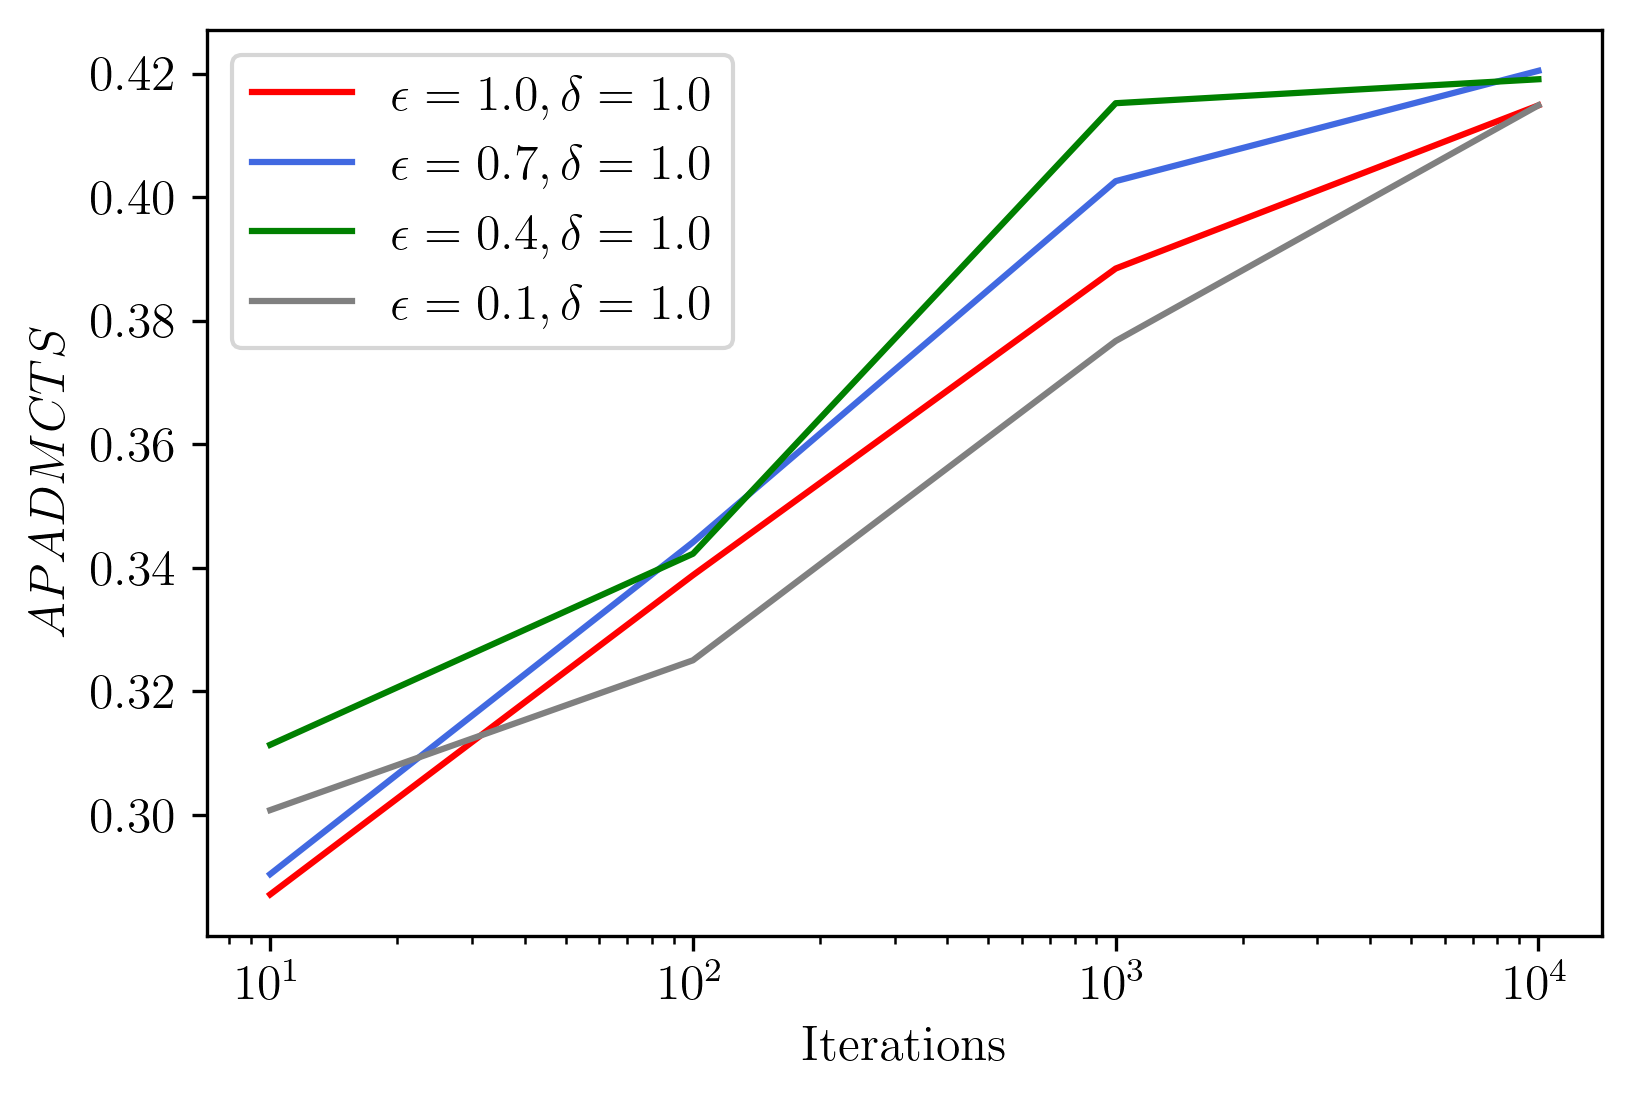

In [70]:
plt.figure(dpi=300)

keys = [int(k.split('-')[1]) for k, v in data.items() if not k.__contains__("-v")]
mean = np.array([v.mean(axis=1).mean() for k, v in data.items() if not k.__contains__("-v")])
std = np.array([v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if not k.__contains__("-v")])
plt.plot(keys, mean, label="$\epsilon=1.0, \delta=1.0$", c="red", zorder=1)

keys = [int(k.split('-')[1]) for k, v in data.items() if k.__contains__("v2")]
mean = np.array([v.mean(axis=1).mean() for k, v in data.items() if k.__contains__("v2")])
std = np.array([v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if k.__contains__("v2")])
plt.plot(keys, mean, label="$\epsilon=0.7, \delta=1.0$", c="royalblue", zorder=1)

keys = [int(k.split('-')[1]) for k, v in data.items() if k.__contains__("v3")]
mean = np.array([v.mean(axis=1).mean() for k, v in data.items() if k.__contains__("v3")])
std = np.array([v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if k.__contains__("v3")])
plt.plot(keys, mean, label="$\epsilon=0.4, \delta=1.0$", c="green",zorder=1)

keys = [int(k.split('-')[1]) for k, v in data.items() if k.__contains__("v4")]
mean = np.array([v.mean(axis=1).mean() for k, v in data.items() if k.__contains__("v4")])
std = np.array([v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if k.__contains__("v4")])
plt.plot(keys, mean, label="$\epsilon=0.1, \delta=1.0$", c="gray",zorder=1)


plt.gca().set_xscale('log')
plt.xlabel('Iterations')
plt.ylabel('$APADMCTS$')
plt.legend()
plt.show()

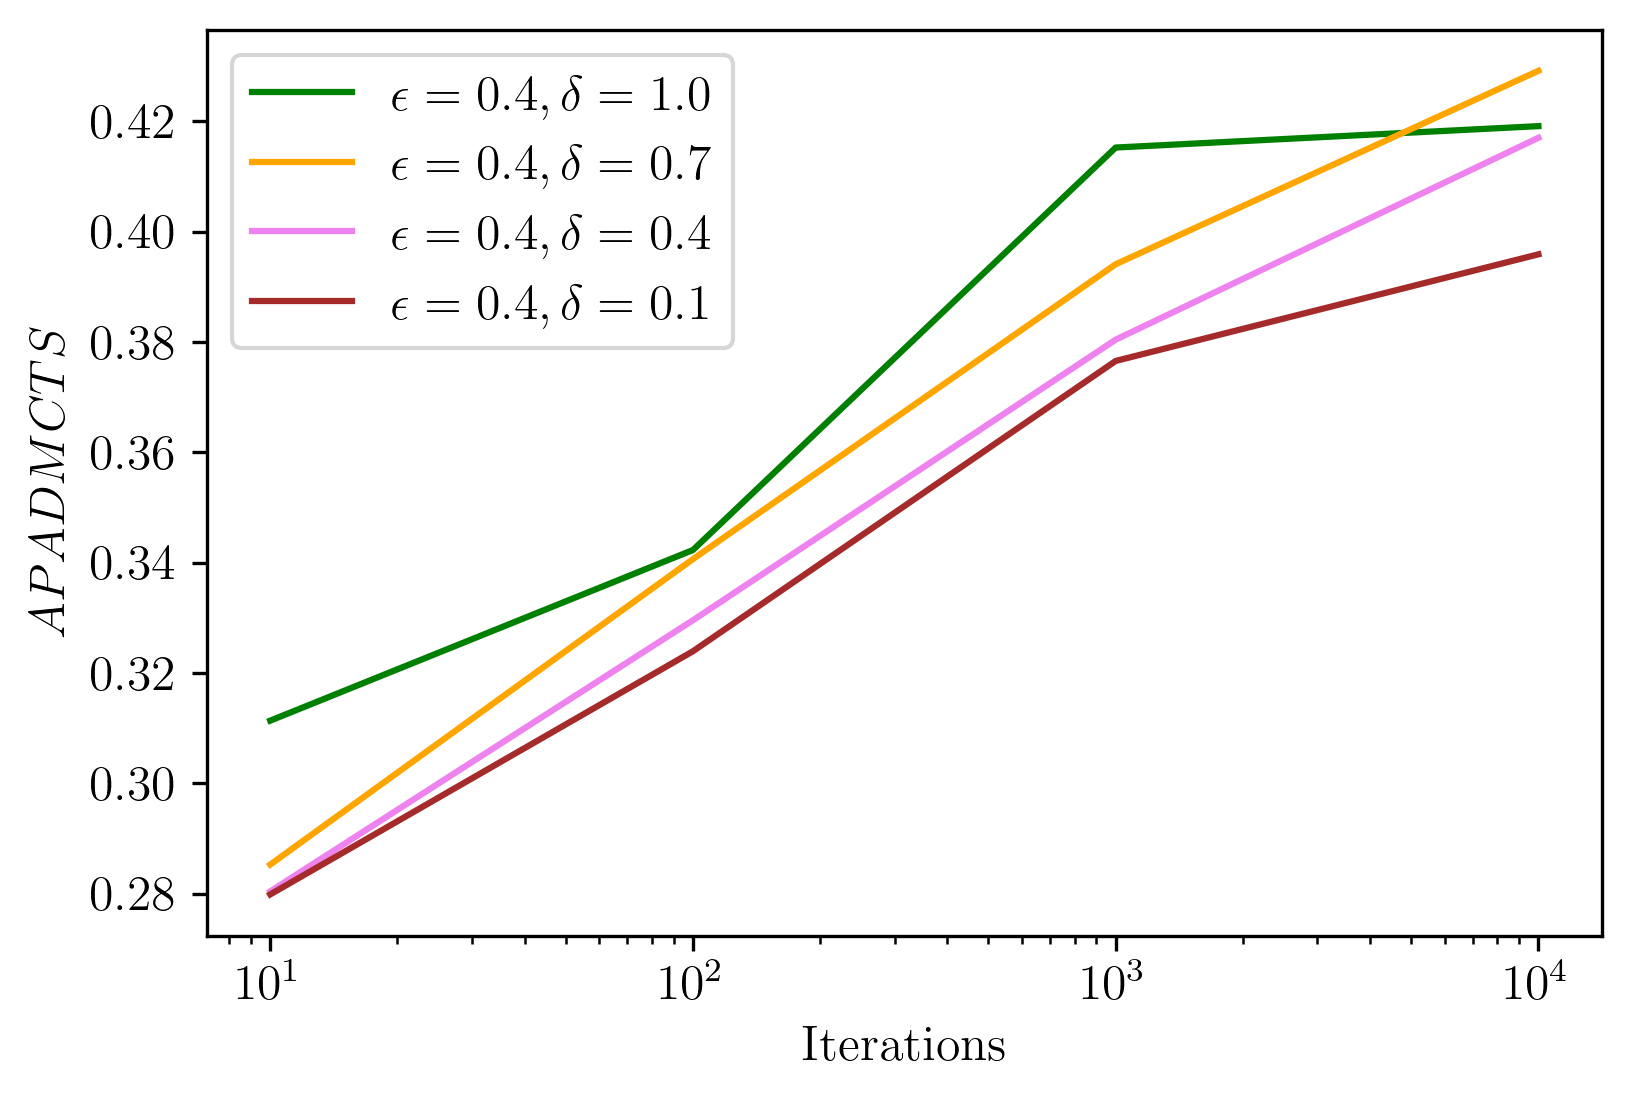

In [71]:
plt.figure(dpi=300)


keys = [int(k.split('-')[1]) for k, v in data.items() if k.__contains__("v3")]
mean = np.array([v.mean(axis=1).mean() for k, v in data.items() if k.__contains__("v3")])
std = np.array([v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if k.__contains__("v3")])
plt.plot(keys, mean, label="$\epsilon=0.4, \delta=1.0$", c="green",zorder=1)

keys = [int(k.split('-')[1]) for k, v in data.items() if k.__contains__("v5")]
mean = np.array([v.mean(axis=1).mean() for k, v in data.items() if k.__contains__("v5")])
std = np.array([v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if k.__contains__("v5")])
plt.plot(keys, mean, label="$\epsilon=0.4, \delta=0.7$", c="orange",zorder=1)

keys = [int(k.split('-')[1]) for k, v in data.items() if k.__contains__("v6")]
mean = np.array([v.mean(axis=1).mean() for k, v in data.items() if k.__contains__("v6")])
std = np.array([v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if k.__contains__("v6")])
plt.plot(keys, mean, label="$\epsilon=0.4, \delta=0.4$", c="violet",zorder=1)

keys = [int(k.split('-')[1]) for k, v in data.items() if k.__contains__("v7")]
mean = np.array([v.mean(axis=1).mean() for k, v in data.items() if k.__contains__("v7")])
std = np.array([v.mean(axis=1).std() / np.sqrt(v.shape[0]) for k, v in data.items() if k.__contains__("v7")])
plt.plot(keys, mean, label="$\epsilon=0.4, \delta=0.1$", c="brown",zorder=1)

plt.gca().set_xscale('log')
plt.xlabel('Iterations')
plt.ylabel('$APADMCTS$')
plt.legend()
plt.show()